N: 1000, 10000

Epsilon: 10, 1, 0.1

T: 10, 100, 10000


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
def plotDP(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, arrayLeaf_store, arrayTree_sortSubroot_store, arrayTree_sortD_store, xlable, ylable, title):
    xpoints = np.linspace(0, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    y4points = arrayLeaf_store
    y5points = arrayTree_sortSubroot_store
    y6points = arrayTree_sortD_store

    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="CountDP_leaf")
    plt.plot(xpoints, y2points, 'r^', label="CountDP_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="CountDP_tree_sortD")
    
    plt.plot(xpoints, y4points, 'bv', label="StoreDP_leaf")
    plt.plot(xpoints, y5points, 'rv', label="StoreDP_tree_sortSubRoot")
    plt.plot(xpoints, y6points, 'gv', label="StoreDP_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


In [3]:
def plotSort(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, xlable, ylable, title):
    xpoints = np.linspace(0, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="SortTime_leaf")
    plt.plot(xpoints, y2points, 'r^', label="SortTime_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="SortTime_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()



In [4]:
# T:10, eps:1, N:1000
# T:10, eps:1, N:1000

# T:10, eps:10, N:10000 -> runtime
# T:10, eps:1, N:10000 -> runtime

# T:100, eps:10, N:1000 
# T:100, eps:1, N:10000 

# T:10000, eps:10, N:1000 -> log variance
# T:10000, eps:1, N:1000 -> log variance

In [5]:
def readFileReturnMean(fileName):
    with open(fileName) as f:
        lines = f.readlines()
    runs = int(len(lines) / 6)
   # print(runs)
    #for i in range(18):
    #    print(lines[i])

    metricRunTimeDPSort = [None]*runs
    metricDPError = [None]*runs
    metricDPStoreError = [None]*runs
    for i in range(runs):
        metricRunTimeDPSort_string = lines[(i*6) + 2]
        metricRunTimeDPSort_string_result = re.search('metricRunTimeDPSort: (.*)\n', metricRunTimeDPSort_string).group(1)
        metricRunTimeDPSort[i] = [int(e) for e in metricRunTimeDPSort_string_result.split(",")]
        metricDPError_string = lines[(i*6) + 3]
        metricDPError_string_result = re.search('metricDPError: (.*)\n', metricDPError_string).group(1)
        metricDPError[i] = [int(e) for e in metricDPError_string_result.split(",")]
        metricDPStoreError_string = lines[(i*6) + 4]
        metricDPStoreError_string_result = re.search('metricDPStoreError: (.*)\n', metricDPStoreError_string).group(1)
        metricDPStoreError[i] = [int(e) for e in metricDPStoreError_string_result.split(",")]

    metricRunTimeDPSort_mean = np.mean(np.array(metricRunTimeDPSort), axis = 0)
    metricDPError_mean = np.mean(np.array(metricDPError), axis = 0)
    metricDPStoreError_mean = np.mean(np.array(metricDPStoreError), axis = 0)
    
    d = dict(); 
    d['metricRunTimeDPSort_mean'] = metricRunTimeDPSort_mean
    d['metricDPError_mean'] = metricDPError_mean
    d['metricDPStoreError_mean'] = metricDPStoreError_mean

    return d

    '''
    print(metricRunTimeDPSort)
    print(metricDPError)
    print(metricDPStoreError)
    print(metricRunTimeDPSort_mean)
    print(metricDPError_mean)
    print(metricDPStoreError_mean)
    return metricRunTimeDPSort_mean, metricDPError_mean, metricDPStoreError_mean
    '''




In [6]:
def plots(T, eps, N):
    # create file names
    T_string = str(T)+","
    eps_string = str(eps)+","
    N_string = str(N)
    fileNameLeaf = "leaftaxi_ss1.txt,"+T_string+eps_string+N_string+";1.txt"
    fileNameTreeSortRoot = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",0;1.txt"
    fileNameTreeSortD = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",2;1.txt"

    # read files, parse and return mean
    returnedMeanLeaf = readFileReturnMean(fileNameLeaf)
    returnedMeanSortRoot = readFileReturnMean(fileNameTreeSortRoot)
    returnedMeanSortD = readFileReturnMean(fileNameTreeSortD)

    # three metrics
        #leaf 
    LeafRunTimeDPSort_mean = returnedMeanLeaf["metricRunTimeDPSort_mean"]
    LeafDPError_mean = returnedMeanLeaf["metricDPError_mean"]
    LeafDPStoreError_mean = returnedMeanLeaf["metricDPStoreError_mean"]
        #tree_sortRoot
    SortRootRunTimeDPSort_mean = returnedMeanSortRoot["metricRunTimeDPSort_mean"]
    SortRootDPError_mean = returnedMeanSortRoot["metricDPError_mean"]
    SortRootDPStoreError_mean = returnedMeanSortRoot["metricDPStoreError_mean"]
        #tree_sortD
    SortDRunTimeDPSort_mean = returnedMeanSortD["metricRunTimeDPSort_mean"]
    SortDDPError_mean = returnedMeanSortD["metricDPError_mean"]
    SortDDPStoreError_mean = returnedMeanSortD["metricDPStoreError_mean"]

    title = "T:"+str(T)+"; eps:"+str(eps)+"; N:"+str(N)
    plotSort(T, LeafRunTimeDPSort_mean, SortRootRunTimeDPSort_mean, SortDRunTimeDPSort_mean, "time", "sortTime(s)", title)
    plotDP(T, LeafDPError_mean, SortRootDPError_mean, SortDDPError_mean, LeafDPStoreError_mean, SortRootDPStoreError_mean, SortDDPStoreError_mean, "time", "accuracy", title)



***************************************************************


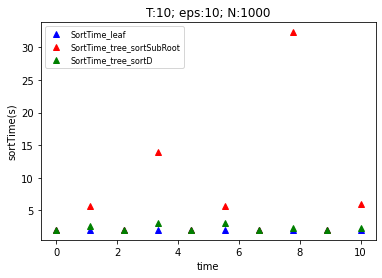

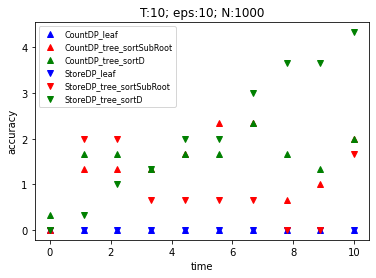

***************************************************************


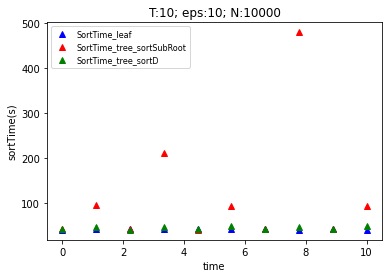

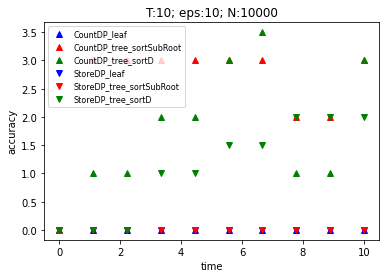

***************************************************************


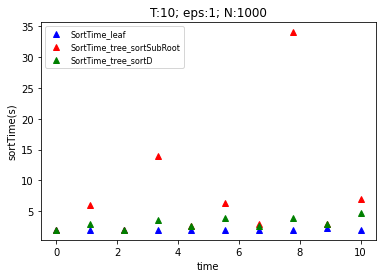

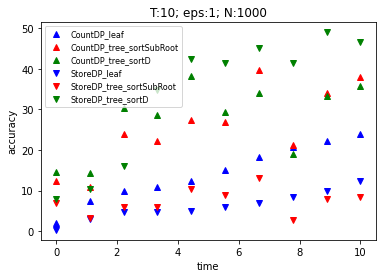

***************************************************************


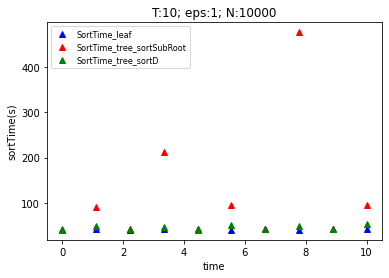

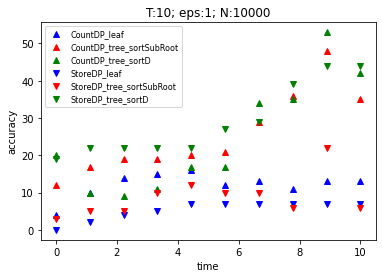

***************************************************************


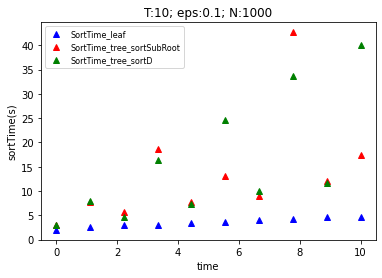

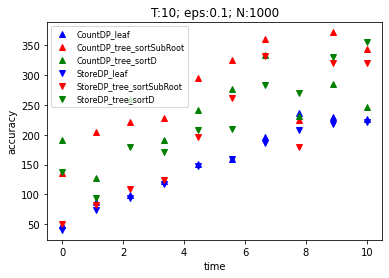

***************************************************************


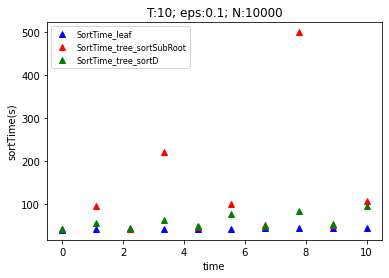

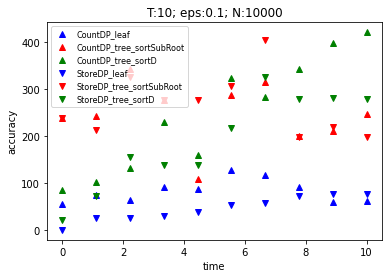

In [12]:
#T:10; eps:10, 1, 0.1; N:1000
T_list = [10]
eps_list = [10, 1, 0.1]
N_list = [1000, 10000]

for T in T_list:
    for eps in eps_list:
        for N in N_list:
            print("***************************************************************")
            plots(T, eps, N)


In [24]:
import os
import sys; sys.path.insert(0, '.') # add parent folder path where lib folder is
from plot_functions import plots

In [ ]:
plot_functions